# Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Stats
from statsmodels.graphics.gofplots import qqplot

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Holdout, Cross Val
from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit

# Preprocessing
## Imputers
from sklearn.impute import SimpleImputer, KNNImputer

## Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

## Encoders
from sklearn.preprocessing import OneHotEncoder

## Pipeline and Column Transformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn import set_config; set_config(display="diagram")

# Evaluation
## Scoring Methods
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_validate, cross_val_score
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Regression Models
## Linear
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
## Non-linear
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
## Support Vectors
from sklearn.svm import SVR
## Ensemble Methods
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor

# Data Exploration

## Load data

In [2]:
data = pd.read_csv("../data/data.csv", thousands=',')
data.head(5)

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,1674.0,52.9,790.0,655.0,851.0
1,M,18.0,1678.0,55.8,825.0,654.0,880.0
2,M,23.0,1790.0,57.5,800.0,650.0,870.0
3,F,37.0,1626.0,66.3,962.0,820.0,997.0
4,M,24.0,1722.0,69.2,948.0,785.0,937.0


In [3]:
data.shape

(5137, 7)

In [4]:
male_data = data[data['gender'] == "M"]
male_data.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,1674.0,52.9,790.0,655.0,851.0
1,M,18.0,1678.0,55.8,825.0,654.0,880.0
2,M,23.0,1790.0,57.5,800.0,650.0,870.0
4,M,24.0,1722.0,69.2,948.0,785.0,937.0
5,M,57.0,1696.0,72.5,940.0,894.0,936.0


In [5]:
male_data.describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,2561.000000,2560.000000,2557.000000,2558.000000,2558.000000,2558.000000
mean,30.255759,1722.525000,70.975792,921.329163,817.064894,950.684519
std,13.596522,59.313885,11.861968,81.283522,98.677515,64.349038
min,15.000000,1354.000000,41.500000,711.000000,590.000000,776.000000
25%,19.000000,1684.000000,62.500000,865.000000,742.000000,905.000000
50%,26.000000,1722.000000,69.700000,918.000000,812.000000,946.000000
75%,38.000000,1761.000000,78.000000,974.000000,881.000000,991.000000
max,69.000000,1915.000000,139.200000,1277.000000,1249.000000,1276.000000


In [6]:
female_data = data[data['gender'] == "F"]
female_data.head()

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
3,F,37.0,1626.0,66.3,962.0,820.0,997.0
7,F,19.0,1557.0,49.5,814.0,690.0,900.0
8,F,38.0,1577.0,62.1,885.0,745.0,1025.0
10,F,26.0,1744.0,89.0,1042.0,908.0,1084.0
11,F,58.0,1539.0,54.6,891.0,800.0,875.0


In [7]:
female_data.describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,2575.000000,2575.000000,2573.000000,2575.000000,2575.000000,2575.000000
mean,32.908738,1586.297476,56.821026,872.166990,754.953010,930.432621
std,15.101927,57.708502,8.910429,82.342539,94.220994,58.182242
min,15.000000,1401.000000,36.800000,671.000000,562.000000,782.000000
25%,19.000000,1547.500000,50.600000,813.000000,685.000000,891.000000
50%,30.000000,1585.000000,55.900000,863.000000,740.000000,925.000000
75%,44.000000,1625.000000,61.300000,922.000000,811.000000,963.000000
max,69.000000,1768.000000,110.400000,1241.000000,1187.000000,1312.000000


In [85]:
male_data[male_data['age'] == 16].describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,192.0,192.000000,192.000000,192.000000,192.000000,192.000000
mean,16.0,1718.026042,63.054688,847.604167,732.630208,917.697917
std,0.0,56.149896,10.523859,69.985410,80.322216,64.914220
min,16.0,1561.000000,44.700000,724.000000,590.000000,780.000000
25%,16.0,1677.000000,56.775000,800.000000,681.000000,874.750000
50%,16.0,1714.500000,61.200000,830.500000,710.000000,906.000000
75%,16.0,1756.000000,67.750000,888.500000,768.500000,953.250000
max,16.0,1852.000000,111.400000,1102.000000,1018.000000,1204.000000


In [84]:
female_data[female_data['age'] == 16].describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,217.0,217.00000,217.000000,217.000000,217.000000,217.000000
mean,16.0,1596.56682,53.463594,822.000000,688.336406,915.069124
std,0.0,49.23664,6.973701,64.476237,59.317977,48.382062
min,16.0,1456.00000,39.800000,680.000000,575.000000,811.000000
25%,16.0,1568.00000,48.600000,780.000000,645.000000,881.000000
50%,16.0,1600.00000,52.400000,815.000000,685.000000,913.000000
75%,16.0,1630.00000,57.800000,863.000000,722.000000,945.000000
max,16.0,1726.00000,80.700000,1094.000000,961.000000,1082.000000


In [8]:
data.describe()

,age,height,weight,bust_circumference,waist_circumference,hip_circumference
count,5136.000000,5135.000000,5130.000000,5133.000000,5133.000000,5133.000000
mean,31.585864,1654.212269,63.876335,896.666667,785.906098,940.525034
std,14.430710,89.797613,12.650398,85.422339,101.335262,62.157501
min,15.000000,1354.000000,36.800000,671.000000,562.000000,776.000000
25%,19.000000,1584.000000,54.600000,834.000000,708.000000,898.000000
50%,28.000000,1653.000000,61.750000,890.000000,775.000000,935.000000
75%,40.000000,1724.000000,71.500000,952.000000,853.000000,976.000000
max,69.000000,1915.000000,139.200000,1277.000000,1249.000000,1312.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5136 non-null   object 
 1   age                  5136 non-null   float64
 2   height               5135 non-null   float64
 3   weight               5130 non-null   float64
 4   bust_circumference   5133 non-null   float64
 5   waist_circumference  5133 non-null   float64
 6   hip_circumference    5133 non-null   float64
dtypes: float64(6), object(1)
memory usage: 281.1+ KB


## Data Cleaning

### Drop duplicates

In [10]:
data = data.drop_duplicates()
data

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,1674.0,52.9,790.0,655.0,851.0
1,M,18.0,1678.0,55.8,825.0,654.0,880.0
2,M,23.0,1790.0,57.5,800.0,650.0,870.0
3,F,37.0,1626.0,66.3,962.0,820.0,997.0
4,M,24.0,1722.0,69.2,948.0,785.0,937.0
...,...,...,...,...,...,...,...
5132,M,32.0,1756.0,65.4,896.0,820.0,930.0
5133,F,22.0,1619.0,52.7,838.0,734.0,926.0
5134,M,27.0,1760.0,75.0,930.0,845.0,983.0
5135,M,56.0,1562.0,62.2,890.0,866.0,887.0


### Check missing values

In [11]:
data[data.isna().any(axis=1)]

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
1801,F,19.0,1620.0,NaN,775.0,622.0,850.0
2360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3258,M,17.0,1762.0,NaN,836.0,690.0,900.0
3303,M,31.0,1725.0,NaN,NaN,NaN,NaN
3752,M,20.0,1821.0,NaN,931.0,762.0,942.0
4189,M,22.0,1730.0,NaN,NaN,NaN,NaN
4603,F,63.0,1573.0,NaN,1002.0,910.0,928.0
4876,M,37.0,NaN,83.9,NaN,NaN,NaN


In [12]:
data = data.dropna()
data

,gender,age,height,weight,bust_circumference,waist_circumference,hip_circumference
0,M,18.0,1674.0,52.9,790.0,655.0,851.0
1,M,18.0,1678.0,55.8,825.0,654.0,880.0
2,M,23.0,1790.0,57.5,800.0,650.0,870.0
3,F,37.0,1626.0,66.3,962.0,820.0,997.0
4,M,24.0,1722.0,69.2,948.0,785.0,937.0
...,...,...,...,...,...,...,...
5132,M,32.0,1756.0,65.4,896.0,820.0,930.0
5133,F,22.0,1619.0,52.7,838.0,734.0,926.0
5134,M,27.0,1760.0,75.0,930.0,845.0,983.0
5135,M,56.0,1562.0,62.2,890.0,866.0,887.0


## Checking correlation

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_17436/2170376162.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(),


<AxesSubplot:>

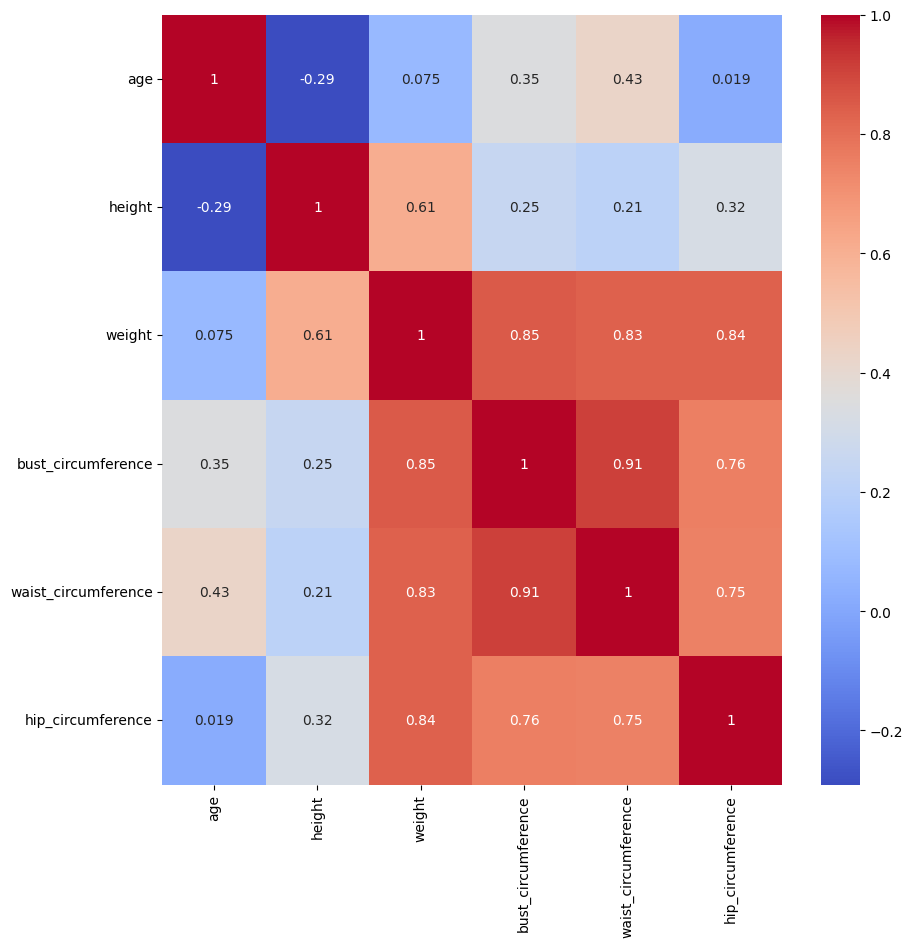

In [13]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    data.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10}
)

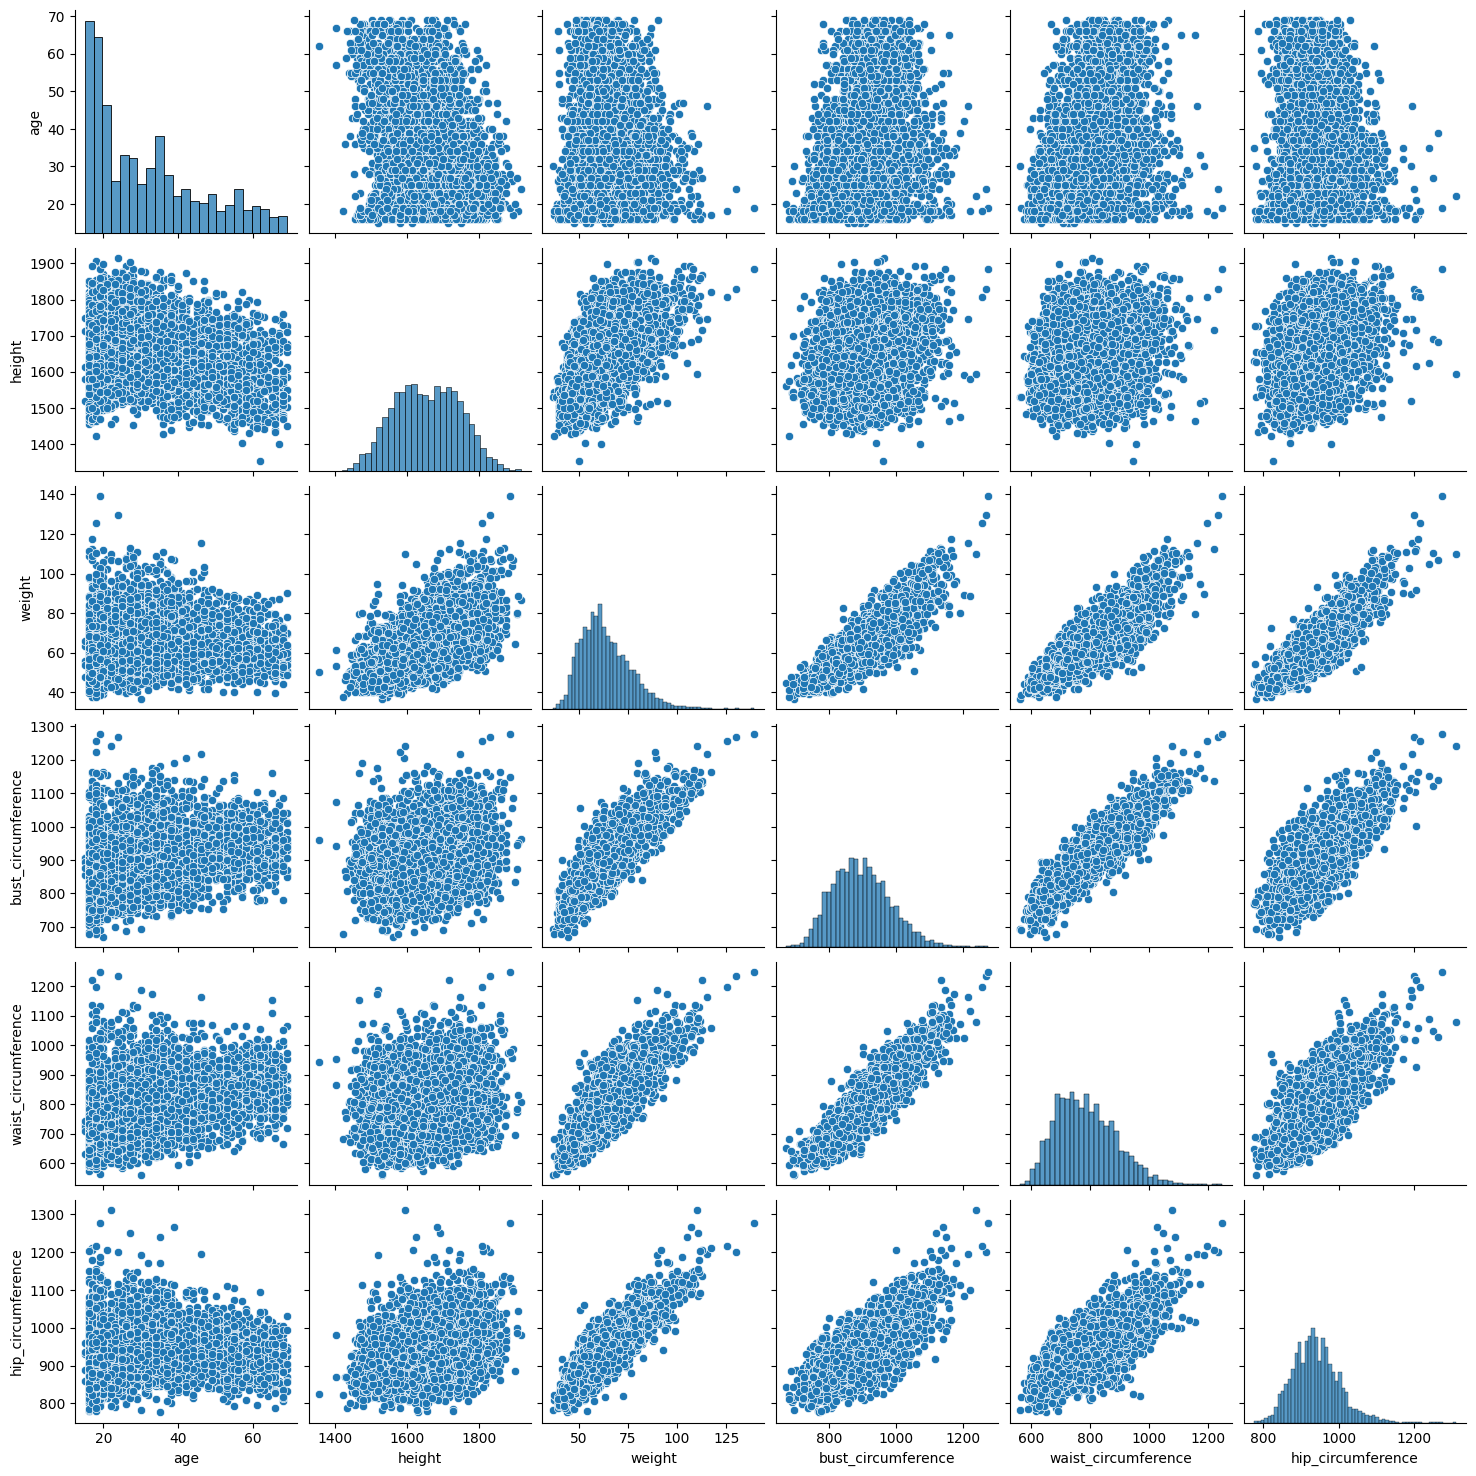

In [14]:
sns.pairplot(data)

# Defining features and target

In [15]:
data.columns

Index(['gender', 'age', 'height', 'weight', 'bust_circumference',
       'waist_circumference', 'hip_circumference'],
      dtype='object')

In [16]:
y = data[["bust_circumference", "waist_circumference", "hip_circumference"]]
y

,bust_circumference,waist_circumference,hip_circumference
0,790.0,655.0,851.0
1,825.0,654.0,880.0
2,800.0,650.0,870.0
3,962.0,820.0,997.0
4,948.0,785.0,937.0
...,...,...,...
5132,896.0,820.0,930.0
5133,838.0,734.0,926.0
5134,930.0,845.0,983.0
5135,890.0,866.0,887.0


In [17]:
X = data.drop(columns=["bust_circumference", "waist_circumference", "hip_circumference"])
X

,gender,age,height,weight
0,M,18.0,1674.0,52.9
1,M,18.0,1678.0,55.8
2,M,23.0,1790.0,57.5
3,F,37.0,1626.0,66.3
4,M,24.0,1722.0,69.2
...,...,...,...,...
5132,M,32.0,1756.0,65.4
5133,F,22.0,1619.0,52.7
5134,M,27.0,1760.0,75.0
5135,M,56.0,1562.0,62.2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4100, 4), (1025, 4), (4100, 3), (1025, 3))

## What kind of features?

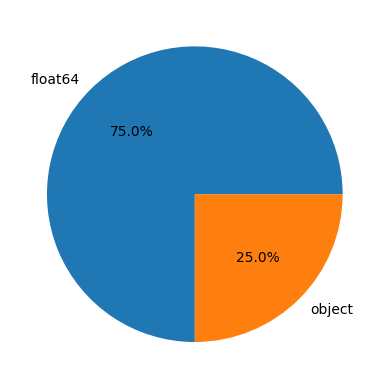

In [19]:
X_train.dtypes.value_counts().plot(kind="pie", autopct='%1.1f%%');

In [20]:
# NUMERICAL FEATURES
numerical_features = X_train.select_dtypes(include=["float64"]).columns
print(f"There are {len(numerical_features)} numerical features:")
display(numerical_features)

There are 3 numerical features:


Index(['age', 'height', 'weight'], dtype='object')

In [21]:
# CATEGORICAL FEATURES
categorical_features = X_train.select_dtypes(include=["object"]).columns
print(f"There are {len(categorical_features)} categorical features:")
display(categorical_features)

There are 1 categorical features:


Index(['gender'], dtype='object')

## Check the datasets balance for Gender


<AxesSubplot:xlabel='gender', ylabel='Count'>

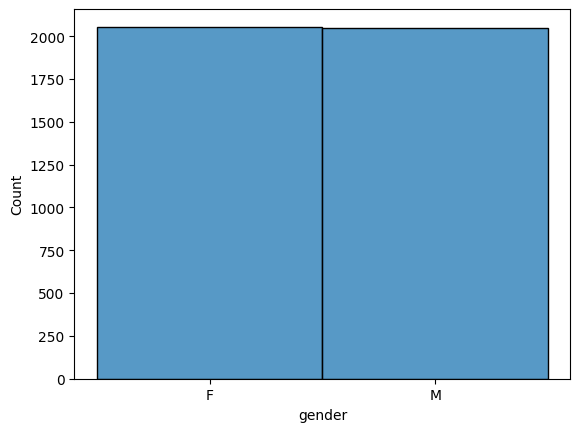

In [22]:
sns.histplot(data=X_train, x="gender")

## Visualization for Numerical Features

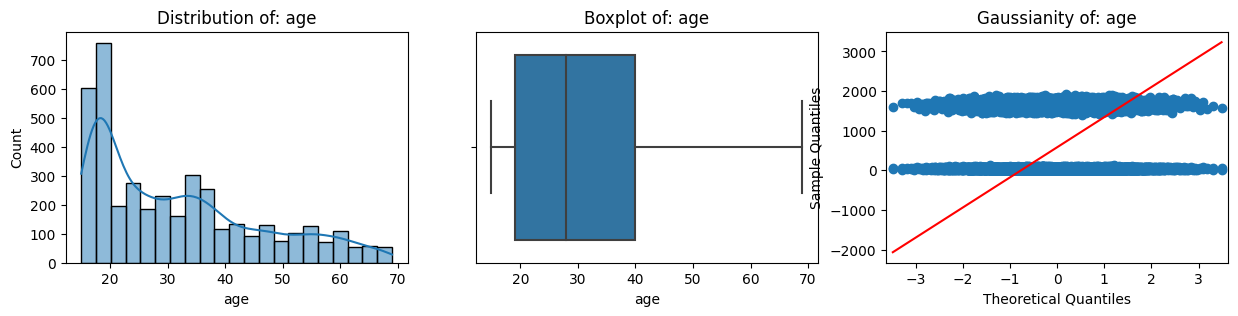

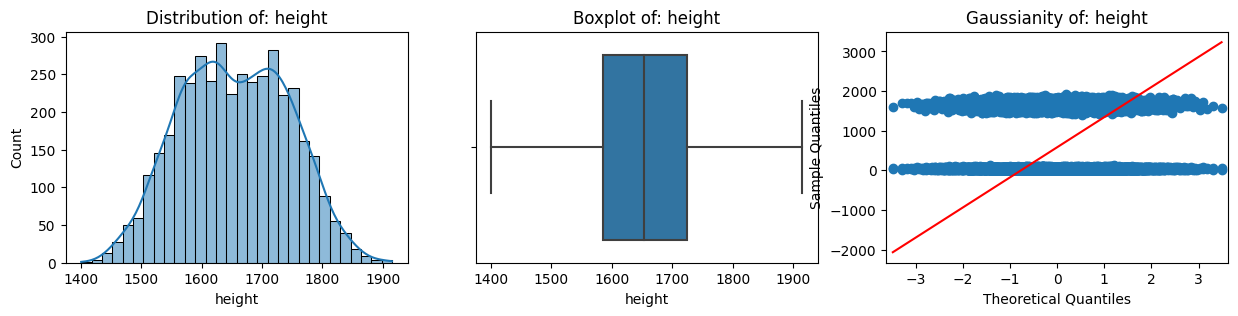

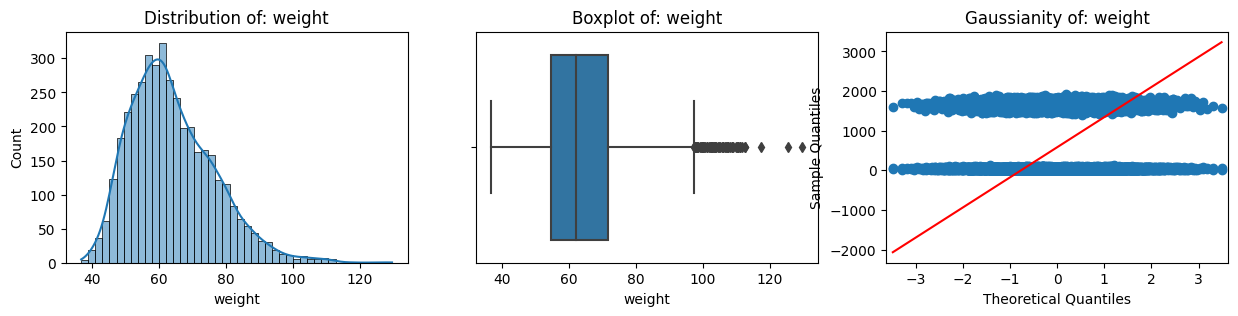

In [23]:
for numerical_feature in numerical_features:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = X_train[numerical_features], x = numerical_feature, kde=True, ax = ax[0]);
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = X_train[numerical_features], x = numerical_feature, ax=ax[1]);
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_train[numerical_features][numerical_features],line='s',ax=ax[2]);

    plt.show();

## Target distribution

<AxesSubplot:ylabel='Count'>

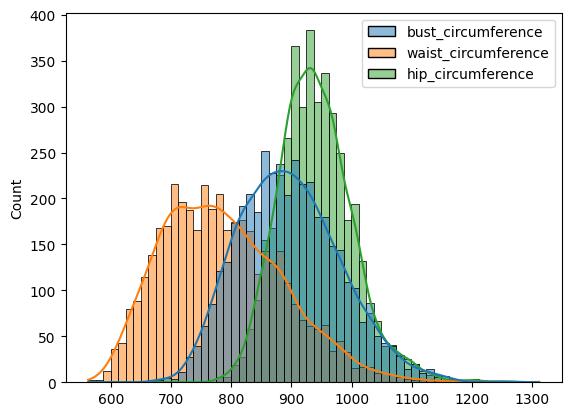

In [24]:
sns.histplot(y_train, kde=True)

# Preparing the preprocessor

## Pipeline for numerical features

In [25]:
X_train_num = X_train.select_dtypes(include=["float64"])
X_train_num.head(3)

,age,height,weight
3364,36.0,1587.0,54.8
3964,19.0,1696.0,59.4
3701,22.0,1710.0,65.5


In [26]:
num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy="median")),
    ('minmax_scaler', MinMaxScaler())
]).set_output(transform="pandas")

num_pipeline

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('minmax_scaler', MinMaxScaler())])

In [27]:
num_pipeline.fit_transform(X_train_num).head(3)

,age,height,weight
3364,0.388889,0.361868,0.193757
3964,0.074074,0.573930,0.243272
3701,0.129630,0.601167,0.308934


## Pipeline for categorical features

In [28]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_cat.head(3)

,gender
3364,F
3964,M
3701,M


In [29]:
cat_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('ohe', OneHotEncoder(sparse_output=False, drop="if_binary", handle_unknown="ignore"))
]).set_output(transform="pandas")

cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

In [30]:
cat_pipeline.fit_transform(X_train_cat)

,gender_M
3364,0.0
3964,1.0
3701,1.0
3585,0.0
4157,0.0
...,...
3052,0.0
1217,1.0
234,0.0
155,0.0


In [31]:
preproc = ColumnTransformer([
    ("num_pipeline", num_pipeline, make_column_selector(dtype_include=["float64"])),
    ("cat_pipeline", cat_pipeline, make_column_selector(dtype_exclude=["float64"])),
], remainder="drop").set_output(transform="pandas")

preproc

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29c28ed70>),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x29c28dfc0>)])

# Model Selection

## Linear Regression

In [32]:
linear = LinearRegression()
pipe_linear = make_pipeline(preproc, linear)
mse_score = cross_val_score(pipe_linear, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 29.672790035200862


In [33]:
linear = LinearRegression()
pipe_linear = make_pipeline(preproc, linear)
r2_score = cross_val_score(pipe_linear, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.8696020487146688


## Ridge

In [34]:
ridge = Ridge()
pipe_ridge = make_pipeline(preproc, ridge)
mse_score = cross_val_score(pipe_ridge, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 29.74408723380061


In [35]:
ridge = Ridge()
pipe_ridge = make_pipeline(preproc, ridge)
r2_score = cross_val_score(pipe_ridge, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.8690011018559011


## Lasso

In [36]:
lasso = Lasso()
pipe_lasso = make_pipeline(preproc, lasso)
mse_score = cross_val_score(pipe_lasso, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 32.8703327920359


In [37]:
lasso = Lasso()
pipe_lasso = make_pipeline(preproc, lasso)
r2_score = cross_val_score(pipe_lasso, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.8389391343518502


## KNN

In [38]:
knn = KNeighborsRegressor()
pipe_knn = make_pipeline(preproc, knn)
mse_score = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 32.75159312205317


In [39]:
knn = KNeighborsRegressor()
pipe_knn = make_pipeline(preproc, knn)
r2_score = cross_val_score(pipe_knn, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.84178089560597


## Trees

In [40]:
trees = DecisionTreeRegressor()
pipe_trees = make_pipeline(preproc, trees)
mse_score = cross_val_score(pipe_trees, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 41.85183505607581


In [41]:
trees = DecisionTreeRegressor()
pipe_trees = make_pipeline(preproc, trees)
r2_score = cross_val_score(pipe_trees, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.7382572079788512


## Random forest

In [42]:
rf = RandomForestRegressor()
pipe_rf = make_pipeline(preproc, rf)
mse_score = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 31.281438664848228


In [43]:
rf = RandomForestRegressor()
pipe_rf = make_pipeline(preproc, rf)
r2_score = cross_val_score(pipe_rf, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.8546669253090512


## ElasticNet

In [44]:
ec = ElasticNet()
pipe_ec = make_pipeline(preproc, ec)
mse_score = cross_val_score(pipe_ec, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 79.02389891231984


In [45]:
ec = ElasticNet()
pipe_ec = make_pipeline(preproc, ec)
r2_score = cross_val_score(pipe_ec, X_train, y_train, cv=5).mean()
print(f"R-square Score: {r2_score}")

R-square Score: 0.10284977848063377


# Feature engineering

In [46]:
import sys

In [47]:
sys.path

['/Users/yusuke/code/projects/body-size-pred/notebooks',
 '/Users/yusuke/code/lewagon/04-Decision-Science/01-Project-Setup/data-context-and-setup',
 '/Users/yusuke/code/projects/body-size-pred/notebooks',
 '/Users/yusuke/.pyenv/versions/3.10.6/lib/python310.zip',
 '/Users/yusuke/.pyenv/versions/3.10.6/lib/python3.10',
 '/Users/yusuke/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages',
 '/Users/yusuke/code/lewagon/07-ML-Ops/04-Predict-in-production/data-fast-api',
 '/Users/yusuke/code/yusuke0127/ds-mlops-week-full-recap']

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from utils.custom_transformer import AgeGroupTransformer, BMICalculator, BMICategoryTransformer, HeightToWeightRatio

## BMI

In [49]:
# Assuming 'height' and 'weight' are the names of your columns for height and weight, respectively
bmi_calculator = BMICalculator(height_column='height', weight_column='weight')

# Adjust the preproc to include BMI feature
pre_bmi_preproc = Pipeline([
    ('bmi_calc', bmi_calculator)
])

# Full preprocessing pipeline now starts with BMI calculation
full_preproc = Pipeline([
    ('pre_bmi', pre_bmi_preproc),
    ('preproc', preproc)  # 'preproc' is your original ColumnTransformer
])

# Update the main pipeline to use full_preproc
pipe_test = Pipeline([
    ('full_preproc', full_preproc),
    ('model', LinearRegression())
])

In [50]:
mse_score = cross_val_score(pipe_test, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 28.851980827266743


## Height to weight to ratio

In [51]:
# Define the custom transformer for height-to-weight ratio
height_to_weight_transformer = Pipeline([
    ('height_to_weight_ratio', HeightToWeightRatio())
])

# Define the preprocessing pipeline (updated with the custom transformer before ColumnTransformer)
full_pipeline = Pipeline([
    ('add_features', height_to_weight_transformer),  # First, add the custom feature
    ('preprocessing', preproc)                       # Then, apply the original preprocessing
])

# Now, 'full_pipeline' is your updated pipeline that includes the new height-to-weight ratio feature.
# You can proceed to use 'full_pipeline' in model training just like any other scikit-learn pipeline.
pipe_test = Pipeline([
    ('full_preproc', full_pipeline),
    ('model', LinearRegression())
])

pipe_test

Pipeline(steps=[('full_preproc',
                 Pipeline(steps=[('add_features',
                                  Pipeline(steps=[('height_to_weight_ratio',
                                                   HeightToWeightRatio())])),
                                 ('preprocessing',
                                  ColumnTransformer(transformers=[('num_pipeline',
                                                                   Pipeline(steps=[('num_imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('minmax_scaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28ed70>),
                                                                  ('cat_pipeline',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28dfc0>)]))])),
                ('model', LinearRegression())])

In [52]:
mse_score = cross_val_score(pipe_test, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 29.11760137236359


## Age Group

In [53]:
# Assuming the AgeGroupTransformer is defined as above and other components are defined as previously mentioned

# Define a pipeline for the age group transformation
age_group_transformer = Pipeline([
    ('age_group', AgeGroupTransformer())
])

# Assuming 'preproc' is your original ColumnTransformer
# Define the full preprocessing pipeline, including the new age group feature
full_preprocessing_pipeline = Pipeline(steps=[
    ('add_age_group', age_group_transformer),  # Add age groups first
    ('preproc', preproc)                       # Then apply the original preprocessing
])

# Your final pipeline for modeling, including the preprocessing and model placeholder
pipe_test = Pipeline([
    ('full_preprocessing', full_preprocessing_pipeline),
    ('model', LinearRegression())  # Placeholder for the model
])
pipe_test

Pipeline(steps=[('full_preprocessing',
                 Pipeline(steps=[('add_age_group',
                                  Pipeline(steps=[('age_group',
                                                   AgeGroupTransformer())])),
                                 ('preproc',
                                  ColumnTransformer(transformers=[('num_pipeline',
                                                                   Pipeline(steps=[('num_imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('minmax_scaler',
                                                                                    MinMaxScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28ed70>),
                                                                  ('cat_pipeline',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28dfc0>)]))])),
                ('model', LinearRegression())])

In [54]:
mse_score = cross_val_score(pipe_test, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 29.689005257068604


## BMI Category

In [55]:
# Assuming the AgeGroupTransformer is defined as above and other components are defined as previously mentioned

# bmi_calculator = BMICalculator(height_column='height', weight_column='weight')

pre_bmi_preproc = Pipeline([
    ('bmi_calc', BMICalculator(height_column='height', weight_column='weight'))
])

# Define a pipeline for the bmi group transformation
bmi_category_transformer = Pipeline([
    ('bmi_group', BMICategoryTransformer())
])

# Assuming 'preproc' is your original ColumnTransformer
# Define the full preprocessing pipeline, including the new age group feature
full_preprocessing_pipeline = Pipeline(steps=[
    ('pre_bmi', pre_bmi_preproc),
    ('add_bmi_group', bmi_category_transformer),  # Add age groups first
    ('preproc', preproc)                       # Then apply the original preprocessing
])

# Your final pipeline for modeling, including the preprocessing and model placeholder
pipe_test = Pipeline([
    ('full_preprocessing', full_preprocessing_pipeline),
    ('model', LinearRegression())  # Placeholder for the model
])
pipe_test

Pipeline(steps=[('full_preprocessing',
                 Pipeline(steps=[('pre_bmi',
                                  Pipeline(steps=[('bmi_calc',
                                                   BMICalculator(height_column='height',
                                                                 weight_column='weight'))])),
                                 ('add_bmi_group',
                                  Pipeline(steps=[('bmi_group',
                                                   BMICategoryTransformer())])),
                                 ('preproc',
                                  ColumnTransformer(transformers=[('num_pipeline',
                                                                   Pipeline(steps=[('num_imputer',
                                                                                    SimpleImputer(strategy='med...
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28ed70>),
                                                                  ('cat_pipeline',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c28dfc0>)]))])),
                ('model', LinearRegression())])

In [56]:
mse_score = cross_val_score(pipe_test, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 28.733330574760124


## Applying Polynomial feature to age column

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline to apply polynomial features to the age column
age_poly_pipeline = Pipeline([
    ('age_selector', ColumnTransformer([
        ('select_age', 'passthrough', ['age'])  # Assuming 'age' is the column name
    ], remainder='drop')),
    ('age_poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

age_poly_pipeline

Pipeline(steps=[('age_selector',
                 ColumnTransformer(transformers=[('select_age', 'passthrough',
                                                  ['age'])])),
                ('age_poly', PolynomialFeatures(include_bias=False))])

In [58]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import FeatureUnion

# Adjusted preproc to include age polynomial features along with existing preprocessing
preproc_with_age_poly = ColumnTransformer([
    # Include the original numerical and categorical pipelines
    ("num_pipeline", num_pipeline, make_column_selector(dtype_include=["float64"])),
    ("cat_pipeline", cat_pipeline, make_column_selector(dtype_exclude=["float64"])),
    # Add the age polynomial features pipeline
    ("age_poly_pipeline", age_poly_pipeline, ["age"])
], remainder="drop")

# Now, your preproc_with_age_poly is ready to be used in the final pipeline
final_pipeline = Pipeline([
    ('preprocessing', preproc_with_age_poly),
    ('model', LinearRegression())  # This is a placeholder for the model
])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29c214b80>),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('...
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x29c214ee0>),
                                                 ('age_poly_pipeline',
                                                  Pipeline(steps=[('age_selector',
                                                                   ColumnTransformer(transformers=[('select_age',
                                                                                                    'passthrough',
                                                                                                    ['age'])])),
                                                                  ('age_poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age'])])),
                ('model', LinearRegression())])

In [59]:
mse_score = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 29.659193792758963


In [60]:
age_poly_pipeline

Pipeline(steps=[('age_selector',
                 ColumnTransformer(transformers=[('select_age', 'passthrough',
                                                  ['age'])])),
                ('age_poly', PolynomialFeatures(include_bias=False))])

## Final Preprocessor

In [61]:
from sklearn.pipeline import FeatureUnion

# Assuming 'height' and 'weight' are the names of your columns for height and weight, respectively
bmi_calculator = BMICalculator(height_column='height', weight_column='weight')

# Adjust the preproc to include BMI feature
pre_bmi_preproc = Pipeline([
    ('bmi_calc', bmi_calculator)
])

# Assuming BMICalculator, BMICategoryTransformer, HeightToWeightRatio, and AgeGroupTransformer are defined
age_poly_pipeline = Pipeline([
    ('age_selector', ColumnTransformer([
        ('select_age', 'passthrough', ['age'])  # Assuming 'age' is the column name
    ], remainder='drop')),
    ('age_poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

# Define the original ColumnTransformer
preproc = ColumnTransformer([
    ("num_pipeline", num_pipeline, make_column_selector(dtype_include=["float64"])),
    ("cat_pipeline", cat_pipeline, make_column_selector(dtype_exclude=["float64"])),
    ("age_poly_pipeline", age_poly_pipeline, ["age"])

], remainder="drop").set_output(transform="pandas")


# Define a FeatureUnion for custom transformations
custom_transformers = Pipeline([
    ('bmi_group', BMICategoryTransformer()),
    ('height_to_weight_ratio', HeightToWeightRatio()),
#     # The age_poly_pipeline will be integrated in a different way since it requires column selection
    ('age_group', AgeGroupTransformer())
])

# Now, integrate the custom transformers with the original preprocessing steps
# Note: The direct integration of age_poly_pipeline in custom_transformers is not straightforward
# due to the need for column selection, which is better handled within a ColumnTransformer

# Full preprocessing pipeline with corrections
full_preproc = Pipeline([
    ('pre_bmi', pre_bmi_preproc),  # BMI calculation first
    ('custom_transformers', custom_transformers),  # Apply custom transformers
#     ("age_poly_pipeline", age_poly_pipeline)
    ('preproc', preproc)  # Apply original preprocessing
])

# Assuming age_poly_pipeline is correctly defined, it should be integrated in a ColumnTransformer
# where you can specify columns directly, possibly within 'preproc' or as another step before or after 'custom_transformers'
final_pipeline = Pipeline([
    ('preprocessing', full_preproc),
    ('model', LinearRegression())  # This is a placeholder for the model
])
final_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pre_bmi',
                                  Pipeline(steps=[('bmi_calc',
                                                   BMICalculator(height_column='height',
                                                                 weight_column='weight'))])),
                                 ('custom_transformers',
                                  Pipeline(steps=[('bmi_group',
                                                   BMICategoryTransformer()),
                                                  ('height_to_weight_ratio',
                                                   HeightToWeightRatio()),
                                                  ('age_group',
                                                   AgeGroupTransformer())])),
                                 ('preproc',
                                  ColumnTransformer(tr...
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29c1b6cb0>),
                                                                  ('age_poly_pipeline',
                                                                   Pipeline(steps=[('age_selector',
                                                                                    ColumnTransformer(transformers=[('select_age',
                                                                                                                     'passthrough',
                                                                                                                     ['age'])])),
                                                                                   ('age_poly',
                                                                                    PolynomialFeatures(include_bias=False))]),
                                                                   ['age'])]))])),
                ('model', LinearRegression())])

In [62]:
from sklearn.pipeline import FeatureUnion

# Assuming 'height' and 'weight' are the names of your columns for height and weight, respectively
bmi_calculator = BMICalculator(height_column='height', weight_column='weight')

# Adjust the preproc to include BMI feature
pre_bmi_preproc = Pipeline([
    ('bmi_calc', bmi_calculator)
])

# Assuming BMICalculator, BMICategoryTransformer, HeightToWeightRatio, and AgeGroupTransformer are defined
age_poly_pipeline = Pipeline([
    ('age_selector', ColumnTransformer([
        ('select_age', 'passthrough', ['age'])  # Assuming 'age' is the column name
    ], remainder='drop')),
    ('age_poly', PolynomialFeatures(degree=2, include_bias=False))  # Generate polynomial features
])

# Define the original ColumnTransformer
preproc = ColumnTransformer([
    ("num_pipeline", num_pipeline, make_column_selector(dtype_include=["float64"])),
    ("cat_pipeline", cat_pipeline, make_column_selector(dtype_exclude=["float64"])),
    ("age_poly_pipeline", age_poly_pipeline, ["age"])

], remainder="drop").set_output(transform="pandas")


# Define a FeatureUnion for custom transformations
custom_transformers = Pipeline([
    ('bmi_group', BMICategoryTransformer()),
    ('height_to_weight_ratio', HeightToWeightRatio()),
#     # The age_poly_pipeline will be integrated in a different way since it requires column selection
    ('age_group', AgeGroupTransformer())
])

# Now, integrate the custom transformers with the original preprocessing steps
# Note: The direct integration of age_poly_pipeline in custom_transformers is not straightforward
# due to the need for column selection, which is better handled within a ColumnTransformer

# Full preprocessing pipeline with corrections
full_preproc = Pipeline([
    ('pre_bmi', pre_bmi_preproc),  # BMI calculation first
    ('custom_transformers', custom_transformers),  # Apply custom transformers
#     ("age_poly_pipeline", age_poly_pipeline)
    ('preproc', preproc)  # Apply original preprocessing
])

# Assuming age_poly_pipeline is correctly defined, it should be integrated in a ColumnTransformer
# where you can specify columns directly, possibly within 'preproc' or as another step before or after 'custom_transformers'
final_preproc = Pipeline([
    ('preprocessing', full_preproc),
])
final_preproc

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pre_bmi',
                                  Pipeline(steps=[('bmi_calc',
                                                   BMICalculator(height_column='height',
                                                                 weight_column='weight'))])),
                                 ('custom_transformers',
                                  Pipeline(steps=[('bmi_group',
                                                   BMICategoryTransformer()),
                                                  ('height_to_weight_ratio',
                                                   HeightToWeightRatio()),
                                                  ('age_group',
                                                   AgeGroupTransformer())])),
                                 ('preproc',
                                  ColumnTransformer(tr...
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29bee7460>),
                                                                  ('age_poly_pipeline',
                                                                   Pipeline(steps=[('age_selector',
                                                                                    ColumnTransformer(transformers=[('select_age',
                                                                                                                     'passthrough',
                                                                                                                     ['age'])])),
                                                                                   ('age_poly',
                                                                                    PolynomialFeatures(include_bias=False))]),
                                                                   ['age'])]))]))])

In [63]:
mse_score = cross_val_score(final_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
print(f"RMSE Score: {np.sqrt(-mse_score)}")

RMSE Score: 28.7009448067621


# Finetuning

## Ridge

In [64]:
ridge = Ridge()
pipe_ridge = make_pipeline(final_preproc, ridge)

In [65]:
# GridSearch the Ridge regularization
param_grid =  {'ridge__alpha': np.linspace(0.5,2,num=20)}
search_ridge = GridSearchCV(
    pipe_ridge, 
    param_grid=param_grid,                           
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring="neg_mean_squared_error"
)

search_ridge.fit(X_train, y_train);


# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", search_ridge.best_params_)
print("Best Cross-Validated Score:", np.sqrt(-search_ridge.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'ridge__alpha': 0.5}
Best Cross-Validated Score: 28.751381144432482


## Random Forest

In [66]:
rf = RandomForestRegressor()
pipe_rf = make_pipeline(final_preproc, rf)

In [67]:
# Define the hyperparameter grid
param_grid = {
    # Different values for max_depth
    'randomforestregressor__max_depth': [10, 20, 30, 40, 50],
    # Different values for min_samples_leaf
    'randomforestregressor__min_samples_leaf': [10, 15, 20, 25]
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=pipe_rf, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring="neg_mean_squared_error"
)

# Perform the grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Score:", np.sqrt(-grid_search_rf.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__min_samples_leaf': 10}
Best Cross-Validated Score: 29.58978314019262


## ElasticNet

In [68]:
ec = ElasticNet()
pipe_ec = make_pipeline(final_preproc, ec)

In [69]:
# Define the hyperparameter grid
param_grid = {
    # More values for alpha
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    # More values for l1_ratio
    'elasticnet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]
}
# Create the GridSearchCV object
grid_search_ec = GridSearchCV(
    estimator=pipe_ec, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs=-1,
    verbose=2, 
    scoring="neg_mean_squared_error"
)

# Perform the grid search on the training data
grid_search_ec.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid_search_ec.best_params_)
print("Best Cross-Validated Score:", np.sqrt(-grid_search_ec.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.642e+04, tolerance: 2.376e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.214e+04, tolerance: 2.368e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.325e+05, tolerance: 1.251e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.870e+05, tolerance: 3.330e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

Best Hyperparameters: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.99}
Best Cross-Validated Score: 28.701116670050478


/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.102e+05, tolerance: 2.956e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+06, tolerance: 4.130e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

## Lasso

In [70]:
# Assuming 'full_preproc' is your preprocessing pipeline as defined earlier
# Define the main pipeline with Lasso as the estimator
pipe_lasso = Pipeline([
    ('full_preproc', full_preproc),  # Use your defined preprocessing pipeline
    ('lasso', Lasso())  # Lasso model
])

# Define the hyperparameter grid for Lasso
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Lasso-specific hyperparameters
    # Optionally, include other Lasso parameters here, but alpha is the main one for Lasso
}

# Create the GridSearchCV object for Lasso
grid_search_lasso = GridSearchCV(
    estimator=pipe_lasso, 
    param_grid=param_grid_lasso, 
    cv=5, 
    n_jobs=-1,
    verbose=2, 
    scoring="neg_mean_squared_error"
)

# Assuming X_train and y_train are already defined
# Perform the grid search on the training data for Lasso
grid_search_lasso.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score for Lasso
print("Best Hyperparameters for Lasso:", grid_search_lasso.best_params_)
print("Best Cross-Validated Score for Lasso:", np.sqrt(-grid_search_lasso.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.714e+05, tolerance: 2.376e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+05, tolerance: 2.386e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.997e+05, tolerance: 2.956e+03
  model = cd_fast.enet_coordinate_descent(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.831e+05, tolerance: 4.130e+03
  model = cd_fast.enet_coordinate_descent(


Best Hyperparameters for Lasso: {'lasso__alpha': 0.001}
Best Cross-Validated Score for Lasso: 28.69964336410652


/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.560e+05, tolerance: 1.582e+03
  model = cd_fast.enet_coordinate_descent(


## KNeighbors

In [71]:
# Assuming 'full_preproc' is your preprocessing pipeline as defined earlier
# Define the main pipeline with KNeighborsRegressor as the estimator
pipe_kneighbors = Pipeline([
    ('full_preproc', full_preproc),  # Use your defined preprocessing pipeline
    ('kneighbors', KNeighborsRegressor())  # KNeighborsRegressor model
])

# Define the hyperparameter grid for KNeighborsRegressor
param_grid_kneighbors = {
    'kneighbors__n_neighbors': [3, 5, 10, 15, 20],  # Number of neighbors
    'kneighbors__weights': ['uniform', 'distance'],  # Weight function used in prediction
    # Optionally, include other KNeighborsRegressor parameters here
}

# Create the GridSearchCV object for KNeighborsRegressor
grid_search_kneighbors = GridSearchCV(
    estimator=pipe_kneighbors, 
    param_grid=param_grid_kneighbors, 
    cv=5, 
    n_jobs=-1,
    verbose=2, 
    scoring="neg_mean_squared_error"
)

# Perform the grid search on the training data for KNeighborsRegressor
grid_search_kneighbors.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score for KNeighborsRegressor
print("Best Hyperparameters for KNeighbors:", grid_search_kneighbors.best_params_)
print("Best Cross-Validated Score for KNeighbors:", np.sqrt(-grid_search_kneighbors.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for KNeighbors: {'kneighbors__n_neighbors': 5, 'kneighbors__weights': 'distance'}
Best Cross-Validated Score for KNeighbors: 37.93308950985964


## ExtraTrees

In [72]:
# Assuming 'full_preproc' is your preprocessing pipeline as defined earlier
# Define the main pipeline with KNeighborsRegressor as the estimator
pipe_et = Pipeline([
    ('full_preproc', full_preproc),  # Use your defined preprocessing pipeline
    ('extra_trees', ExtraTreesRegressor())  # KNeighborsRegressor model
])

# Define the hyperparameter grid for KNeighborsRegressor
param_grid_et = {
    'extra_trees__n_estimators': [50, 100, 200],  # Number of neighbors
    'extra_trees__max_depth': [None, 10, 20, 30],  # Weight function used in prediction
    # Optionally, include other KNeighborsRegressor parameters here
}

# Create the GridSearchCV object for KNeighborsRegressor
grid_search_et = GridSearchCV(
    estimator=pipe_et, 
    param_grid=param_grid_et, 
    cv=5, 
    n_jobs=-1,
    verbose=2, 
    scoring="neg_mean_squared_error"
)

# Perform the grid search on the training data for KNeighborsRegressor
grid_search_et.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score for KNeighborsRegressor
print("Best Hyperparameters for ExtraTrees:", grid_search_et.best_params_)
print("Best Cross-Validated Score for ExtraTrees:", np.sqrt(-grid_search_et.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters for ExtraTrees: {'extra_trees__max_depth': 10, 'extra_trees__n_estimators': 200}
Best Cross-Validated Score for ExtraTrees: 29.608224463233604


# Baseline score

In [73]:
# Assuming y_train is your training set target variable with 3 columns
mean_baselines = np.mean(y_train, axis=0)  # Mean for each column
median_baselines = np.median(y_train, axis=0)  # Median for each column

# Generate predictions based on mean or median for each target
mean_predictions = np.tile(mean_baselines, (len(y_test), 1))  # Shape (n_samples, n_targets)
median_predictions = np.tile(median_baselines, (len(y_test), 1))

# Calculate MSE for both baselines, considering all outputs
mean_mse = mean_squared_error(y_test, mean_predictions, multioutput='raw_values')
median_mse = mean_squared_error(y_test, median_predictions, multioutput='raw_values')

# Optionally, you can average the MSE across all outputs for a single performance metric
mean_mse_avg = np.mean(mean_mse)
median_mse_avg = np.mean(median_mse)

print(f"Mean Baseline RMSE for each output: {np.sqrt(mean_mse)}")
print(f"Median Baseline RMSE for each output: {np.sqrt(median_mse)}")
print(f"Average Median Baseline RMSE: {np.sqrt(median_mse_avg)}")
print(f"Average Mean Baseline MSE: {np.sqrt(mean_mse_avg)}")

Mean Baseline RMSE for each output: [ 87.41773402 104.92135206  62.20981977]
Median Baseline RMSE for each output: [ 87.36895134 105.36178786  62.17610709]
Average Median Baseline RMSE: 86.79536910204932
Average Mean Baseline MSE: 86.64181441255477


# Predictions

In [74]:
X_test

,gender,age,height,weight
3014,F,17.0,1685.0,48.4
4426,M,17.0,1668.0,51.8
3179,M,19.0,1783.0,74.1
1098,F,23.0,1570.0,59.5
116,F,19.0,1566.0,57.2
...,...,...,...,...
3842,F,20.0,1549.0,44.4
1655,M,41.0,1698.0,72.6
1651,F,18.0,1644.0,56.7
3996,M,29.0,1765.0,100.5


In [75]:
y_test

,bust_circumference,waist_circumference,hip_circumference
3014,726.0,620.0,880.0
4426,775.0,670.0,830.0
3179,960.0,774.0,945.0
1098,911.0,766.0,937.0
116,830.0,760.0,995.0
...,...,...,...
3842,771.0,611.0,825.0
1655,915.0,850.0,952.0
1651,820.0,705.0,928.0
3996,1080.0,995.0,1085.0


In [76]:
elastic_net = grid_search_ec.best_estimator_
ec_pred = elastic_net.predict(X_test)
elastic_net.score(X_test, y_test)

0.8693505180321931

In [77]:
lasso = grid_search_lasso.best_estimator_
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8695929915470008

In [78]:
ridge = search_ridge.best_estimator_
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8685902019893742

In [79]:
results = pd.DataFrame(lasso_pred, columns=["bust_circumference", "waist_circumeference", "hip_circumference"])
results

,bust_circumference,waist_circumeference,hip_circumference
0,768.998016,629.058170,877.524266
1,780.117266,657.160004,849.754347
2,918.546099,799.442714,974.461667
3,892.775372,768.835520,959.822413
4,871.414949,743.560405,947.095379
...,...,...,...
1020,761.263207,634.152161,858.637145
1021,953.231277,857.241905,954.594175
1022,843.519037,706.768592,936.856010
1023,1089.476856,1018.548817,1096.672308


In [80]:
results.to_csv("../predictions/predicted-measurements.csv", header=True)

## Save the best model

In [81]:
import joblib

# save
joblib.dump(lasso, "../models/model.pkl") 

['../models/model.pkl']

In [82]:
# load
model = joblib.load("../models/model.pkl")
model

Pipeline(steps=[('full_preproc',
                 Pipeline(steps=[('pre_bmi',
                                  Pipeline(steps=[('bmi_calc',
                                                   BMICalculator(height_column='height',
                                                                 weight_column='weight'))])),
                                 ('custom_transformers',
                                  Pipeline(steps=[('bmi_group',
                                                   BMICategoryTransformer()),
                                                  ('height_to_weight_ratio',
                                                   HeightToWeightRatio()),
                                                  ('age_group',
                                                   AgeGroupTransformer())])),
                                 ('preproc',
                                  ColumnTransformer(tra...
                                                                                                  handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x29f7c9720>),
                                                                  ('age_poly_pipeline',
                                                                   Pipeline(steps=[('age_selector',
                                                                                    ColumnTransformer(transformers=[('select_age',
                                                                                                                     'passthrough',
                                                                                                                     ['age'])])),
                                                                                   ('age_poly',
                                                                                    PolynomialFeatures(include_bias=False))]),
                                                                   ['age'])]))])),
                ('lasso', Lasso(alpha=0.001))])